__[Open and try this file online (Colab)](https://colab.research.google.com/github/djekra/bludwig/blob/main/jupyter/30_Train_Any_Dataset/_10_Train_Any_Dataset.ipynb)__

In [23]:
# blab init
try:
    import blab
except ImportError as e:
    !pip install --quiet blab
    import blab    
startup_notebook = blab.blab_startup()
%run $startup_notebook 

blab init
environment['in_colab']     = False
environment['dropbox_path'] = /home/me/Data_Linux/Dropbox
environment['lib_path']     = /home/me/Data_Linux/Dropbox/31_Projekte/01_Python/libs
Start Time: 21:26:05


# Train Any Dataset

In [24]:
# Settings

dataset_name  = 'iris'   # Which dataset shall be loaded?
mode          = 'T'      # mode: C=cleanup, T=train, S=show 
   # Which model shall be trained? 
verbose       = False    

predicts_size = 100      # How many predictions should be created?
predict_model =   1      # Which model should be used to create predictions?

gdrive_base   = 'drive/MyDrive/Colab/65_Neuronale_Netze/40_acincome_binary_classification'
bgc('Beige')

In [25]:
# Colab? >> Install the latest version of Ludwig
if environment['in_colab']:
  !pip uninstall -y tensorflow --quiet
  !python -m pip install git+https://github.com/ludwig-ai/ludwig.git --quiet 
  !pip install ptitprince --quiet 
  !pip install bludwig --quiet 

In [26]:
# cleanup?
if not 'is_neustart' in locals() or mode == 'C': 
    is_neustart = True
    if not mode == 'S': # show
        try:
            !rm -rf results
            !rm *.meta.json
            !rm *.hdf5    
            !rm *.temp.pickle        
            !rm .lock_preprocessing
        except:
            pass
else:
    is_neustart = False    

if mode == 'C':
    raise Stop
else:
    bgc('WhiteSmoke')
    
print('is_neustart:',is_neustart)

is_neustart: False


In [27]:
# import 
import pandas as pd
import pandasklar as pak
grid = pak.grid
import bludwig

## Data

In [28]:
# mount
if environment['in_colab']:
    from google.colab import drive
    drive.mount('/content/drive')  

In [29]:
# load_dataset
data_df, dataset_loader = bludwig.load_dataset(dataset_name)


iris 1.0
Iris Dataset
https://archive.ics.uci.edu/ml/datasets/Iris

output_features: [{'name': 'class', 'type': 'category'}]


In [30]:
# examine
print(data_df.shape[0], 'records for training, validation and test')
pak.sample(data_df,10)

149 records for training, validation and test


,class,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,Iris-setosa,4.9,3.0,1.4,0.2
2,Iris-setosa,4.6,3.1,1.5,0.2
3,Iris-setosa,5.0,3.6,1.4,0.2
12,Iris-setosa,4.3,3.0,1.1,0.1
14,Iris-setosa,5.7,4.4,1.5,0.4
21,Iris-setosa,4.6,3.6,1.0,0.2
60,Iris-versicolor,5.9,3.0,4.2,1.5
99,Iris-virginica,6.3,3.3,6.0,2.5
117,Iris-virginica,7.7,2.6,6.9,2.3
130,Iris-virginica,7.9,3.8,6.4,2.0


In [31]:
# analyse_cols
analyse = bludwig.analyse_cols(data_df, dataset_loader)
analyse

,col_name,is_output_feature,feature_type,datatype_short,datatype_identified,mem_usage,nunique,ndups,vmin,vmax,n
0,class,True,category,string,string,705,3,146,Iris-setosa,Iris-virginica,149
1,sepal_length_cm,False,number,float32,float,40,35,114,4.3,7.9,149
2,sepal_width_cm,False,number,float32,float,40,23,126,2.0,4.4,149
3,petal_length_cm,False,number,float32,float,40,43,106,1.0,6.9,149
4,petal_width_cm,False,number,float32,float,40,22,127,0.1,2.5,149


In [32]:
raise Stop  

Stop Time:  21:26:06
Elapsed:    0 secs


## Config

In [43]:
# config0: automatically generated
config0 = bludwig.config0(data_df, dataset_loader)
print(config0)

input_features:
- name: sepal_length_cm
  type: number
- name: sepal_width_cm
  type: number
- name: petal_length_cm
  type: number
- name: petal_width_cm
  type: number
output_features:
- name: class
  type: category



In [44]:
# config1: provided by dataset
config1 = bludwig.config1(dataset_loader)
print(config1)

In [56]:
# configs
if len(config1) > 0:
    configs       = [ config0, config1 ]
    train_jobs    = [ 0, 1 ]
    predict_model =  1 
else:
    configs       = [ config0 ]
    train_jobs    = [ 0 ]   
    predict_model =  0 

In [46]:
# bludwig initialize
if mode == 'T':  
    ludwig_job = bludwig.LudwigJob( configs=configs, verbose=False) 


1 configs loaded


In [47]:
# bludwig initialize and load
if mode == 'S':  
    ludwig_job = bludwig.LudwigJob() 
    ludwig_job.load_from_results()
    #print(ludwig_job)

## Train

In [48]:
# train and evaluate
out = None
if mode == 'T':  
    ludwig_job.experiment(train_jobs, data_df)
    out = ludwig_job.train_log_to_csv()
out


Training config_no 0 >> results/ex_0_run


2023-06-17 21:34:51,735 - INFO     - Created a temporary directory at /tmp/tmptgtwyrie
2023-06-17 21:34:51,736 - INFO     - Writing /tmp/tmptgtwyrie/_remote_module_non_scriptable.py


train_time: 2 secs

0


,name,model_0
0,accuracy,0.677
1,roc_auc,0.695
2,loss,1.02
3,epochs,9
4,time/epoch,0.2 secs
5,train_time,2 secs


## Evaluate

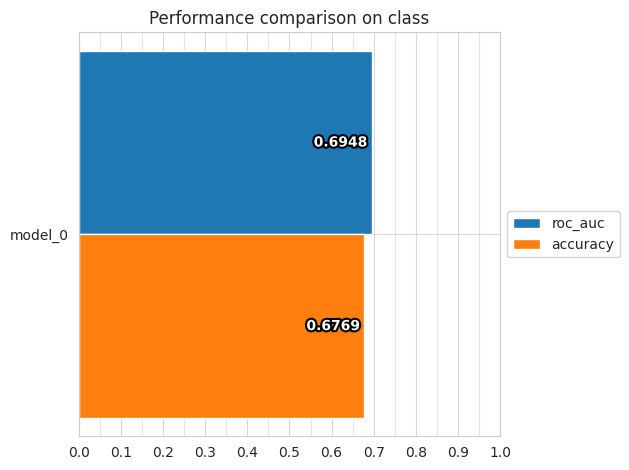

In [49]:
# compare_performance
ludwig_job.compare_performance()

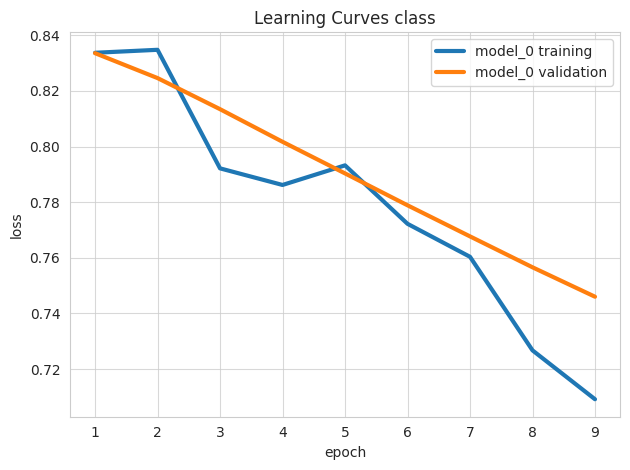

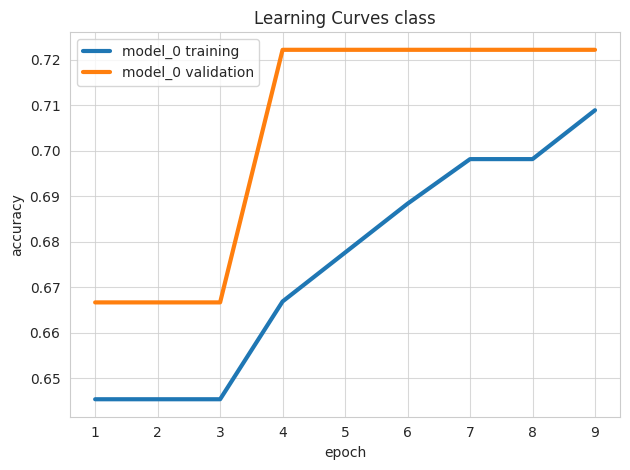

In [50]:
# learning_curves
ludwig_job.learning_curves()

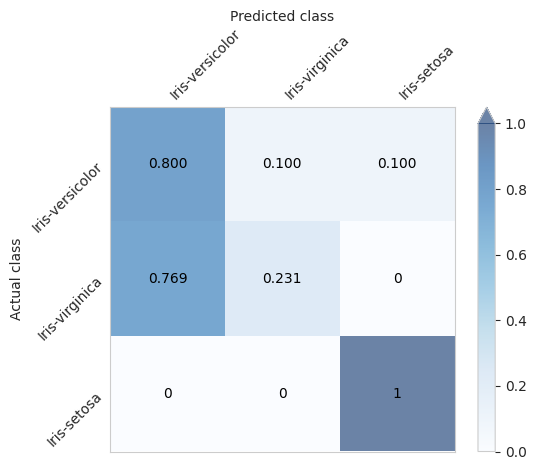

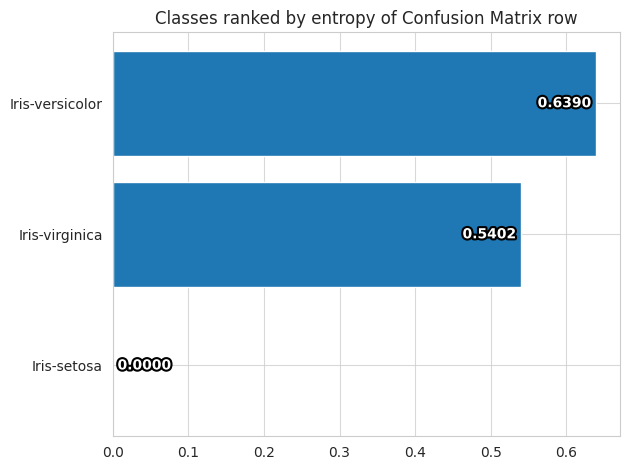

In [51]:
# confusion_matrix
#ludwig_job.load_model(0)
ludwig_job.confusion_matrix()

In [52]:
# roc_curves
ludwig_job.roc_curves()

No roc_curve found


## print_models

In [53]:
# print 
print(ludwig_job)

LudwigJob object
        experiment_name:     ex
        output_feature_name: class
        train_jobs:          [0]
        model_names:         ['model_0']
        model_paths:         ['/home/me/Data_Linux/Dropbox/31_Projekte/01_Python/git/bludwig/jupyter/30_Train_Any_Dataset/results/ex_0_run/model']        
        output_dirs:         ['/home/me/Data_Linux/Dropbox/31_Projekte/01_Python/git/bludwig/jupyter/30_Train_Any_Dataset/results/ex_0_run']
        model_no:            0   
        cuda:                False             
        


In [54]:
ludwig_job.print_models()

### model_0 ###
Layer (type:depth-idx)                             Input Shape               Output Shape              Param #                   Trainable
ECD                                                [2]                       [2, 4]                    --                        True
├─ConcatCombiner: 1-1                              --                        --                        --                        --
│    └─LudwigFeatureDict: 2-1                      --                        --                        --                        --
│    │    └─ModuleDict: 3-1                        --                        --                        --                        --
│    │    │    └─NumberInputFeature: 4-1           [2]                       [2, 1]                    --                        --
│    │    │    │    └─PassthroughEncoder: 5-1      [2, 1]                    [2, 1]                    --                        --
│    │    │    └─NumberInputFeature: 4-2           

## Predict

In [57]:
# load_model
print('predict_model:',predict_model)
ludwig_job.load_model(predict_model)

# data
data_sample = pak.sample(data_df, predicts_size)

# predict
data_sample = ludwig_job.predict(data_sample)
data_sample

predict_model: 0


,class,class_pred,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class_prob,class_prob,class_prob_Iris-versicolor,class_prob_Iris-virginica,class_prob_Iris-setosa
0,Iris-setosa,Iris-setosa,4.9,3.0,1.4,0.2,"[0.19607828557491302, 0.3111913204193115, 0.49...",0.492730,0.196078,0.311191,0.492730
2,Iris-setosa,Iris-setosa,4.6,3.1,1.5,0.2,"[0.10091835260391235, 0.2842170298099518, 0.61...",0.614865,0.100918,0.284217,0.614865
3,Iris-setosa,Iris-setosa,5.0,3.6,1.4,0.2,"[0.050770532339811325, 0.1971282958984375, 0.7...",0.752101,0.050771,0.197128,0.752101
4,Iris-setosa,Iris-setosa,5.4,3.9,1.7,0.4,"[0.038497988134622574, 0.17285606265068054, 0....",0.788646,0.038498,0.172856,0.788646
5,Iris-setosa,Iris-setosa,4.6,3.4,1.4,0.3,"[0.04526903107762337, 0.2541259527206421, 0.70...",0.700605,0.045269,0.254126,0.700605
...,...,...,...,...,...,...,...,...,...,...,...
141,Iris-virginica,Iris-virginica,5.8,2.7,5.1,1.9,"[0.40792351961135864, 0.41427791118621826, 0.1...",0.414278,0.407924,0.414278,0.177799
144,Iris-virginica,Iris-versicolor,6.7,3.0,5.2,2.3,"[0.491105318069458, 0.3970009982585907, 0.1118...",0.491105,0.491105,0.397001,0.111894
146,Iris-virginica,Iris-versicolor,6.5,3.0,5.2,2.0,"[0.4898321032524109, 0.3439779579639435, 0.166...",0.489832,0.489832,0.343978,0.166190
147,Iris-virginica,Iris-virginica,6.2,3.4,5.4,2.3,"[0.159544438123703, 0.49745431542396545, 0.343...",0.497454,0.159544,0.497454,0.343001


In [ ]:
if not environment['in_colab']:
    raise Stop

## Colab: Copy back

In [ ]:
# mount
if environment['in_colab']:
    from google.colab import drive
    drive.mount('/content/drive')  

In [ ]:
if environment['in_colab']:
    !ls

In [ ]:
if environment['in_colab']:
    !ls results

In [ ]:
# results: copy to GDrive
if environment['in_colab']:
  results_path = gdrive_base + '/results'
  !cp -a results $results_path 
  !cp train_log*.csv $gdrive_base 

In [ ]:
if environment['in_colab']:
    print('Copy back manually:')
    print('1) This ipynb-File, if changed')
    print('2) results directory')
    print('3) train_log file')    
else:
    print('finished')

In [ ]:
raise Stop